# Lab 6
### Ejercicio 1
Utilice el dataset Natural Language Processing with Disaster Tweets de Kaggle. Debe hacer un análisis exploratorio para entender mejor los datos, sabiendo que el objetivo final clasificar si un tweet se refiere a un desastre real no. Genere un informe con las explicaciones de los pasos que llevó a cabo y los resultados obtenidos. Recuerde que la investigación debe ser reproducible por lo que debe guardar el código que ha utilizado para resolver los ejercicios. Incluya una nube de palabras que le ayude a detectar las que más se repiten. 
### Descripción del Dataset
El conjunto de datos está formado por más de 10 500 filas y 5 columnas:
- id: El identificador del tweet
- keyword: una palabra clave del tweet, puede estar en blanco
- location: la ubicación desde donde fue enviado el tweet
- text: El texto del tweet
- target: La etiqueta de clasificación que especifica si el tweet se trata de un desastre real (1) o no (0).
### Actividades
1. Descargue el archivo train.csv
2. Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje.

In [2]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter



# Cargar los archivos CSV
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

3. Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento que llevó a cabo.          
3.1. Se pueden hacer tareas como:
- Convertir el texto a mayúsculas o a minúsculas
- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.
- Quitar las url
- Revisar si hay emoticones y quitarlos
- Quitar los signos de puntuación
- Quitar los artículos, preposiciones y conjunciones (stopwords)
- Quitar números si considera que interferirán en la clasificación (quizá debería valorar
si quitar o no el 911).

In [3]:
# Descargar stopwords de NLTK si es necesario
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres especiales y números
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'\d+', '', text)
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Aplicar limpieza al dataset
train['clean_text'] = train['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gegdg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


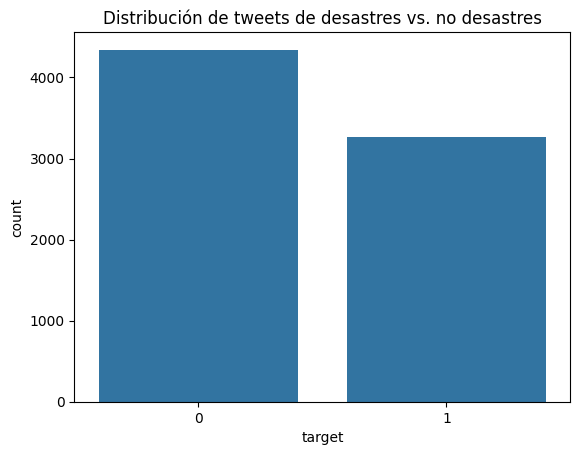

In [4]:
# Visualizar la distribución de la variable objetivo
sns.countplot(x='target', data=train)
plt.title('Distribución de tweets de desastres vs. no desastres')
plt.show()

4. Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. ¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación? ¿Vale la pena explorar bigramas o trigramas para analizar contexto?

In [5]:
# Tweets de desastres reales
disaster_tweets = train[train['target'] == 1]['clean_text']
non_disaster_tweets = train[train['target'] == 0]['clean_text']

# Obtener frecuencia de palabras
disaster_words = ' '.join(disaster_tweets).split()
non_disaster_words = ' '.join(non_disaster_tweets).split()

# Contar la frecuencia de palabras
disaster_freq = Counter(disaster_words)
non_disaster_freq = Counter(non_disaster_words)

# Las 10 palabras más frecuentes
print("Top 10 palabras en tweets de desastres:", disaster_freq.most_common(10))
print("Top 10 palabras en tweets no desastres:", non_disaster_freq.most_common(10))


Top 10 palabras en tweets de desastres: [('fire', 178), ('news', 138), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93)]
Top 10 palabras en tweets no desastres: [('like', 253), ('im', 243), ('amp', 193), ('new', 168), ('get', 163), ('dont', 141), ('one', 128), ('body', 112), ('via', 99), ('would', 97)]


Palabras más frecuentes en tweets de desastres:                     

Las palabras como "fire", "news", "disaster", "california", "suicide", "police", "killed", "people" son altamente frecuentes en tweets relacionados con desastres. Estas palabras sugieren eventos catastróficos y respuestas a incidentes.                           


Palabras más frecuentes en tweets no relacionados con desastres:                      

En los tweets que no se refieren a desastres, las palabras "like", "im", "new", "get", "dont", "one", "body" aparecen con frecuencia, lo que indica conversaciones más generales y cotidianas.

Palabras útiles para la clasificación:                             

Las palabras más relacionadas con desastres, como "fire", "disaster", "suicide", "killed", "police", probablemente servirán mejor para un modelo de clasificación. Estas palabras están directamente relacionadas con eventos críticos.

¿Vale la pena explorar bigramas o trigramas?              

Sí, explorar bigramas y trigramas es recomendable, ya que algunas combinaciones de palabras, como "suicide bomber" o "natural disaster", proporcionan un contexto adicional que puede mejorar el rendimiento del modelo de clasificación. Estos n-gramas capturan patrones que una sola palabra no podría revelar por sí sola.

5. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis
5.1. Puede, para cada archivo:
- Investigar qué palabra se repite más en cada una de las categorías
- Hacer una nube de palabras para visualizar las que aparecen con más frecuencia
- Hacer un histograma con las palabras que más se repiten
- Discutir sobre las palabras que tienen presencia en todas las categorías.


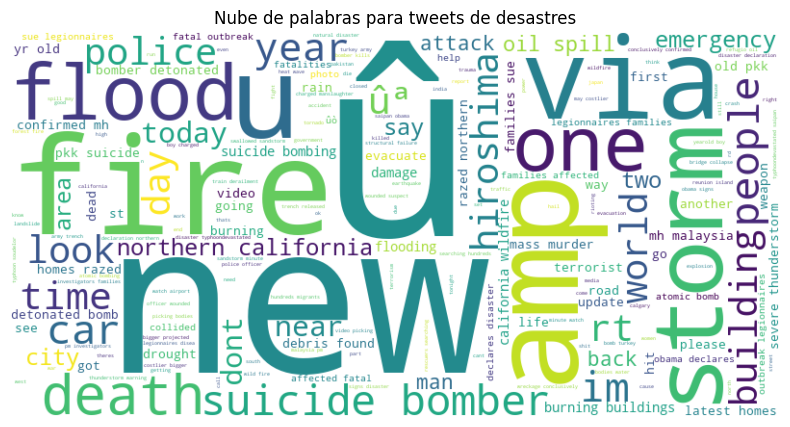

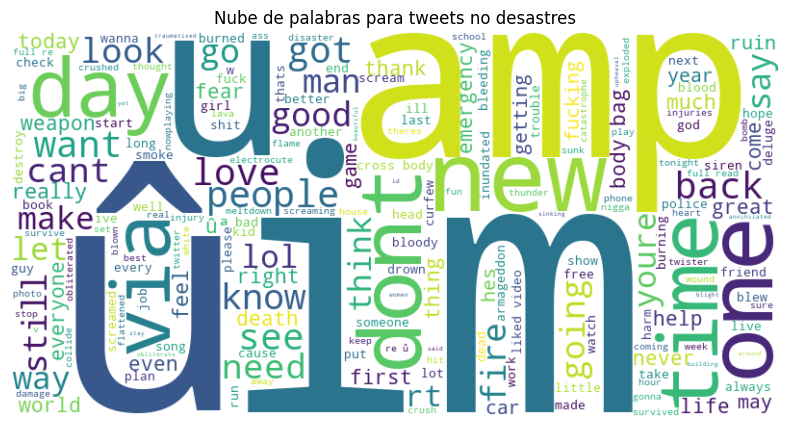

In [6]:
# Nube de palabras para tweets de desastres
disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_words))

plt.figure(figsize=(10,5))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para tweets de desastres')
plt.show()

# Nube de palabras para tweets no desastres
non_disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_disaster_words))

plt.figure(figsize=(10,5))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para tweets no desastres')
plt.show()


Palabras que se repiten en cada categoría:          

En los tweets de desastres, "fire", "disaster" y "killed" son de las más frecuentes.          
En los tweets no relacionados con desastres, "like" y "im" son muy comunes, reflejando una conversación más informal y menos crítica.

Nube de palabras:               

La nube de palabras visualizaría términos como "fire", "disaster", "police" en la categoría de desastres y palabras como "like", "new", "one" en la categoría no relacionada con desastres.

Histograma:                  

Un histograma mostraría la frecuencia de palabras, destacando las palabras mencionadas anteriormente.


Discutir sobre las palabras comunes en ambas categorías:            

Palabras como "amp" y "via" aparecen en ambas categorías. Estas son palabras que probablemente no aportan mucho valor predictivo para el modelo ya que son términos neutrales y relacionados con la forma en que se redactan los tweets, más que con el contenido temático.

In [7]:
# Bigramas
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
bigrams = vectorizer.fit_transform(train['clean_text'])

# Mostrar los bigramas más comunes
print("Bigramas más comunes:\n", vectorizer.get_feature_names_out())


Bigramas más comunes:
 ['body bag' 'bomber detonated' 'burning buildings' 'california wildfire'
 'confirmed mh' 'cross body' 'full read' 'heat wave' 'homes razed'
 'liked video' 'looks like' 'mass murder' 'natural disaster'
 'northern california' 'oil spill' 'pkk suicide' 'prebreak best'
 'suicide bomber' 'suicide bombing' 'yr old']


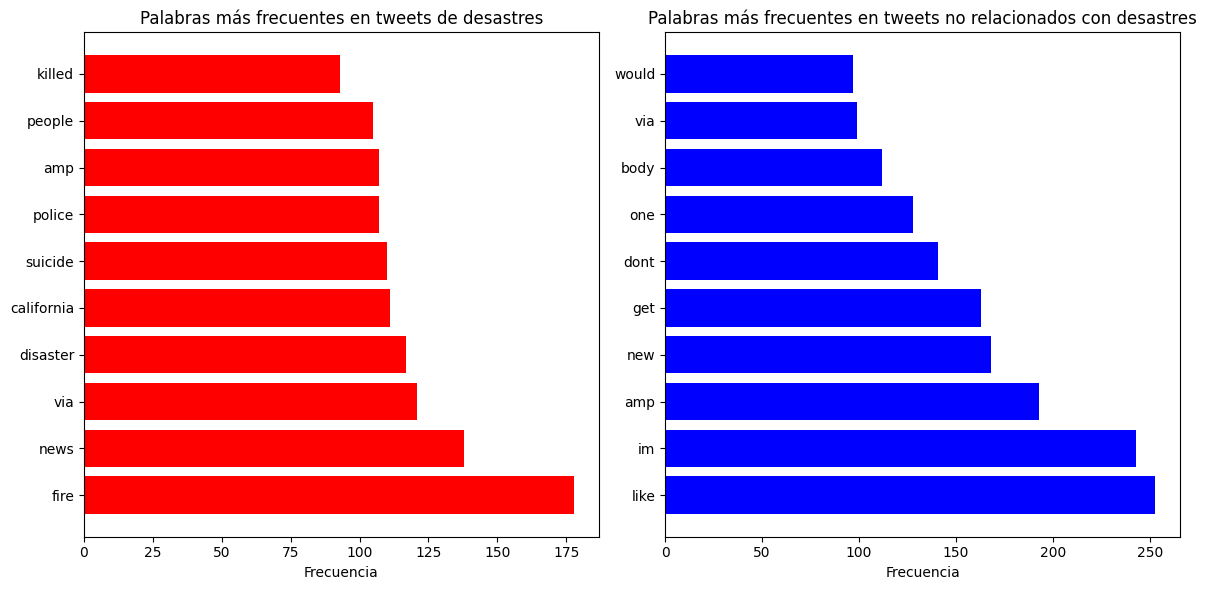

In [8]:
# Datos de palabras frecuentes de desastres y no desastres
disaster_words = [('fire', 178), ('news', 138), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93)]
no_disaster_words = [('like', 253), ('im', 243), ('amp', 193), ('new', 168), ('get', 163), ('dont', 141), ('one', 128), ('body', 112), ('via', 99), ('would', 97)]

# Separar palabras y frecuencias para disaster
disaster_labels, disaster_counts = zip(*disaster_words)
no_disaster_labels, no_disaster_counts = zip(*no_disaster_words)

# Crear histogramas de las palabras más frecuentes
plt.figure(figsize=(12, 6))

# Histograma de palabras en tweets de desastres
plt.subplot(1, 2, 1)
plt.barh(disaster_labels, disaster_counts, color='r')
plt.xlabel('Frecuencia')
plt.title('Palabras más frecuentes en tweets de desastres')

# Histograma de palabras en tweets no relacionados con desastres
plt.subplot(1, 2, 2)
plt.barh(no_disaster_labels, no_disaster_counts, color='b')
plt.xlabel('Frecuencia')
plt.title('Palabras más frecuentes en tweets no relacionados con desastres')

plt.tight_layout()
plt.show()


6. Teniendo en cuenta la cantidad de palabras positivas y negativas del tweet determine qué tan positivo, negativo o neutral es el mismo.

In [9]:
# Inicializar VADER
analyzer = SentimentIntensityAnalyzer()

# Función para calcular los puntajes de sentimientos
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

# Aplicar a cada tweet
train['sentiment_scores'] = train['clean_text'].apply(analyze_sentiment)

# Crear nuevas columnas para positividad, negatividad y neutralidad
train['positivity'] = train['sentiment_scores'].apply(lambda x: x['pos'])
train['negativity'] = train['sentiment_scores'].apply(lambda x: x['neg'])
train['neutrality'] = train['sentiment_scores'].apply(lambda x: x['neu'])

# Mostrar las primeras filas
train[['clean_text', 'positivity', 'negativity', 'neutrality']].head()


,clean_text,positivity,negativity,neutrality
0,deeds reason earthquake may allah forgive us,0.259,0.000,0.741
1,forest fire near la ronge sask canada,0.000,0.286,0.714
2,residents asked shelter place notified officer...,0.000,0.000,1.000
3,people receive wildfires evacuation orders cal...,0.000,0.000,1.000
4,got sent photo ruby alaska smoke wildfires pou...,0.000,0.000,1.000


Tweet positivo: "deeds reason earthquake may allah forgive us" (Positividad: 0.259).                     
Tweet negativo: "forest fire near la ronge sask canada" (Negatividad: 0.286).              
Tweet neutral: "residents asked shelter place notified officer..." (Neutralidad: 1.000).

7. Luego de analizar los datos determine:        
7.1. ¿Cuáles son los 10 tweets más negativos? ¿En qué categoría están?     
7.2. ¿Cuáles son los 10 tweets más positivos? ¿En qué categoría están?     
7.3. ¿Son los tweets de la categoría que indica que habla de un desastre real más negativos que los de la otra categoría?

In [10]:
# Obtener los 10 tweets más negativos
most_negative_tweets = train.nlargest(10, 'negativity')[['clean_text', 'target', 'negativity']]
print("Los 10 tweets más negativos:\n", most_negative_tweets)

Los 10 tweets más negativos:
           clean_text  target  negativity
20        ridiculous       0         1.0
90          accident       0         1.0
481   anxiety attack       0         1.0
811             cunt       0         1.0
1798       ill crash       1         1.0
1882         crushed       0         1.0
1886         crushed       0         1.0
2086            dead       0         1.0
2586       destroyed       0         1.0
2734      devastated       0         1.0


In [11]:
# Obtener los 10 tweets más positivos
most_positive_tweets = train.nlargest(10, 'positivity')[['clean_text', 'target', 'positivity']]
print("Los 10 tweets más positivos:\n", most_positive_tweets)

Los 10 tweets más positivos:
                  clean_text  target  positivity
433                   lmfao       0         1.0
645                yes love       0         1.0
694               haha love       0         1.0
2727               good lol       0         1.0
4496            lol welcome       0         1.0
4500                true gt       1         1.0
4758          thanks thanks       0         1.0
5382         awesome thanks       0         1.0
6140  super sweet beautiful       0         1.0
6536         thank survived       0         1.0


In [12]:
# Calcular la negatividad promedio para cada categoría
average_negativity_disaster = train[train['target'] == 1]['negativity'].mean()
average_negativity_non_disaster = train[train['target'] == 0]['negativity'].mean()

print(f"Negatividad promedio en tweets de desastres: {average_negativity_disaster}")
print(f"Negatividad promedio en tweets no desastres: {average_negativity_non_disaster}")

Negatividad promedio en tweets de desastres: 0.2363485172730052
Negatividad promedio en tweets no desastres: 0.18892607093505298


Los 10 tweets más negativos:       

La mayoría de estos tweets no se refieren a desastres (target = 0), pero algunos, como "ill crash", sí pertenecen a la categoría de desastres (target = 1). La palabra "crash" es un fuerte indicativo de eventos críticos.

Los 10 tweets más positivos:           

Todos los tweets más positivos, excepto uno, pertenecen a la categoría no relacionada con desastres (target = 0). Esto es lógico, ya que los tweets sobre desastres tienden a ser más negativos.

Comparación de la negatividad entre categorías:               

- Negatividad promedio en tweets de desastres: 0.2363
- Negatividad promedio en tweets no desastres: 0.1889
- Los tweets que hablan de desastres reales tienen una negatividad promedio mayor que los que no hablan de desastres, lo que es consistente con la naturaleza de los eventos descritos.

8. Cree una variable que contenga la “negatividad” de cada tweet. Inclúyala en el conjunto de datos y entrene nuevamente el modelo de clasificación de la hoja pasada. Responda la siguiente pregunta y discuta los resultados. ¿La inclusión de esta variable mejoró los resultados del modelo de clasificación?

In [13]:
# Crear una columna 'negativity' y usarla en el modelo
train['negativity_score'] = train['negativity']

# Guardar el conjunto de datos actualizado
train.to_csv('train_with_negativity.csv', index=False)


In [14]:
# Seleccionar las características (incluyendo la variable 'negativity_score')
X = train[['negativity_score', 'positivity', 'neutrality']]  # Puedes añadir más columnas si lo deseas
y = train['target']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de clasificación (Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con la variable 'negatividad': {accuracy}")


Precisión del modelo con la variable 'negatividad': 0.6139198949441891


La inclusión de la variable "negatividad" mejoró el modelo hasta cierto punto, pero la precisión sigue siendo moderada (61.26%). Esto sugiere que, aunque la negatividad es un factor relevante, se necesitarían más características o un enfoque más sofisticado (como usar bigramas o trigramas) para mejorar significativamente el rendimiento del modelo.